In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:/Work/DataFrames/100000_UK_used_car/bmw.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(df,train_size=0.6,random_state=42)

In [7]:
val, test = train_test_split(test,train_size=0.5,random_state=42)

In [9]:
from catboost import CatBoostRegressor

In [10]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

cat_features = ['model', 'transmission', 'fuelType']

y = ['price']

In [11]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.08,
              'random_seed':42,
              'verbose':100}

In [12]:
model = CatBoostRegressor(**parameters)

In [13]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.4564416	test: 0.4677529	best: 0.4677529 (0)	total: 180ms	remaining: 2m 59s
100:	learn: 0.0875290	test: 0.0943826	best: 0.0943826 (100)	total: 3.59s	remaining: 32s
200:	learn: 0.0760834	test: 0.0840362	best: 0.0840362 (200)	total: 7.1s	remaining: 28.2s
300:	learn: 0.0708670	test: 0.0798734	best: 0.0798734 (300)	total: 10.8s	remaining: 25.1s
400:	learn: 0.0676240	test: 0.0783699	best: 0.0783699 (400)	total: 14.4s	remaining: 21.5s
500:	learn: 0.0654070	test: 0.0773711	best: 0.0773397 (496)	total: 18s	remaining: 17.9s
600:	learn: 0.0638577	test: 0.0766618	best: 0.0766618 (600)	total: 21.7s	remaining: 14.4s
700:	learn: 0.0622969	test: 0.0758181	best: 0.0757665 (697)	total: 25.5s	remaining: 10.9s
800:	learn: 0.0609583	test: 0.0751808	best: 0.0751547 (792)	total: 29.3s	remaining: 7.27s
900:	learn: 0.0596089	test: 0.0747658	best: 0.0747658 (900)	total: 32.8s	remaining: 3.61s
999:	learn: 0.0584626	test: 0.0745494	best: 0.0745494 (999)	total: 36.7s	remaining: 0us

bestTest = 0.074549

In [14]:
test['price_pred'] = model.predict(test[X])

In [15]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [16]:
def error(y_true,y_pred):
    print(mean_absolute_error(y_true,y_pred))
    print(mean_absolute_percentage_error(y_true,y_pred))

In [18]:
error(test['price'],test['price_pred'])

1516.8260935952442
0.0704639161640945


# Анализ ошибок

In [19]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred
3166,3 Series,2019,29480,Manual,2802,Diesel,145,54.3,2.0,27237.373956
7058,2 Series,2016,15814,Semi-Auto,28966,Petrol,125,52.3,1.5,14908.927485
376,X3,2020,35900,Semi-Auto,4500,Diesel,150,54.3,2.0,36142.841357
9402,1 Series,2017,11999,Manual,19108,Petrol,145,56.5,1.5,13220.784374
8301,4 Series,2017,22995,Automatic,29989,Diesel,150,49.6,3.0,22140.991536


In [21]:
test['error'] = test['price_pred'] - test['price']

<AxesSubplot:>

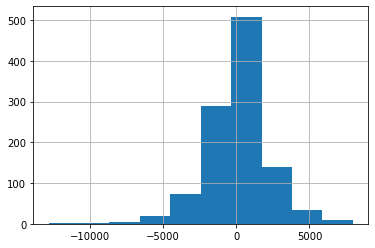

In [22]:
test['error'].hist()

In [23]:
import numpy as np

In [25]:
np.mean([-2000,2200])

100.0

In [26]:
test['error'].mean()

100.68736345552178

# Абсолютная ошибка

In [29]:
test['error_abs'] = abs(test['error'])

<AxesSubplot:>

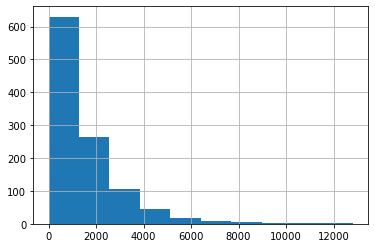

In [30]:
test['error_abs'].hist()

In [31]:
test['error_abs'].describe()

count     1079.000000
mean      1516.826094
std       1539.155453
min          0.588168
25%        501.046427
50%       1059.010943
75%       1969.887726
max      12815.136217
Name: error_abs, dtype: float64

In [32]:
test.sort_values('error_abs',ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32164.863783,-12815.136217,12815.136217
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46800.596850,-11861.403150,11861.403150
5264,5 Series,2019,38450,Automatic,14522,Diesel,145,62.8,2.0,27535.254872,-10914.745128,10914.745128
5281,5 Series,2019,39999,Semi-Auto,5877,Diesel,145,60.1,2.0,29554.310391,-10444.689609,10444.689609
4245,Z4,2020,50800,Semi-Auto,1142,Petrol,145,33.2,3.0,41145.517456,-9654.482544,9654.482544
6956,3 Series,2020,42430,Semi-Auto,102,Diesel,145,50.4,2.0,34232.863027,-8197.136973,8197.136973
2150,X2,2020,24490,Semi-Auto,1,Diesel,145,52.3,2.0,32454.139935,7964.139935,7964.139935
5382,X2,2020,36950,Semi-Auto,10,Diesel,145,50.4,2.0,29139.564579,-7810.435421,7810.435421
496,X4,2020,43000,Semi-Auto,857,Diesel,145,40.9,3.0,50728.370252,7728.370252,7728.370252
5481,4 Series,2019,39995,Automatic,10,Diesel,145,60.1,2.0,32361.445618,-7633.554382,7633.554382


# Анализ абсолютной ошибки относительно цены

In [33]:
test['price_group'] = pd.qcut(test['price'],5)

In [35]:
t = test.groupby('price_group')[['error_abs','error']].agg(['count','mean'])

In [36]:
t

error_abs              error            
                        count         mean count        mean
price_group                                                 
(2989.999, 13999.0]       218   854.145508   218  446.387978
(13999.0, 18500.0]        215  1204.812338   215  273.978517
(18500.0, 22980.0]        215  1301.513388   215  365.829675
(22980.0, 29995.0]        220  1725.394016   220  153.612015
(29995.0, 74990.0]        211  2521.350330   211 -758.409093

In [37]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [38]:
t

,error_abs_count,error_abs_mean,error_count,error_mean
price_group,,,,
"(2989.999, 13999.0]",218,854.145508,218,446.387978
"(13999.0, 18500.0]",215,1204.812338,215,273.978517
"(18500.0, 22980.0]",215,1301.513388,215,365.829675
"(22980.0, 29995.0]",220,1725.394016,220,153.612015
"(29995.0, 74990.0]",211,2521.350330,211,-758.409093


In [39]:
t = t.drop('error_count',axis=1)

In [40]:
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()

In [41]:
t

,error_abs_count,error_abs_mean,error_mean,mean_error_diff
price_group,,,,
"(2989.999, 13999.0]",218,854.145508,446.387978,-662.680586
"(13999.0, 18500.0]",215,1204.812338,273.978517,-312.013756
"(18500.0, 22980.0]",215,1301.513388,365.829675,-215.312706
"(22980.0, 29995.0]",220,1725.394016,153.612015,208.567923
"(29995.0, 74990.0]",211,2521.350330,-758.409093,1004.524237


In [42]:
t['mean_error'] = test['error_abs'].mean()

In [43]:
t

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(2989.999, 13999.0]",218,854.145508,446.387978,-662.680586,1516.826094
"(13999.0, 18500.0]",215,1204.812338,273.978517,-312.013756,1516.826094
"(18500.0, 22980.0]",215,1301.513388,365.829675,-215.312706,1516.826094
"(22980.0, 29995.0]",220,1725.394016,153.612015,208.567923,1516.826094
"(29995.0, 74990.0]",211,2521.350330,-758.409093,1004.524237,1516.826094


In [46]:
import seaborn as sns
cm = sns.dark_palette("red", as_cmap=True)

In [47]:
t.style.background_gradient(cmap=cm,subset=['mean_error_diff'])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(2989.999, 13999.0]",218,854.145508,446.387978,-662.680586,1516.826094
"(13999.0, 18500.0]",215,1204.812338,273.978517,-312.013756,1516.826094
"(18500.0, 22980.0]",215,1301.513388,365.829675,-215.312706,1516.826094
"(22980.0, 29995.0]",220,1725.394016,153.612015,208.567923,1516.826094
"(29995.0, 74990.0]",211,2521.350330,-758.409093,1004.524237,1516.826094


Дешевый автомобиль - это базовый авто без дополнительных опций, поэтому цена зависит от тех features, которые у нас есть (двигатель, пробег). Дорогой авто включает в себя много features, которых нет в наших данных (колесные диски, дорогой салон и т.д.).

# Анализ абсолютной ошибки относительно остальных переменных

In [48]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
3166,3 Series,2019,29480,Manual,2802,Diesel,145,54.3,2.0,27237.373956,-2242.626044,2242.626044,"(22980.0, 29995.0]"
7058,2 Series,2016,15814,Semi-Auto,28966,Petrol,125,52.3,1.5,14908.927485,-905.072515,905.072515,"(13999.0, 18500.0]"
376,X3,2020,35900,Semi-Auto,4500,Diesel,150,54.3,2.0,36142.841357,242.841357,242.841357,"(29995.0, 74990.0]"
9402,1 Series,2017,11999,Manual,19108,Petrol,145,56.5,1.5,13220.784374,1221.784374,1221.784374,"(2989.999, 13999.0]"
8301,4 Series,2017,22995,Automatic,29989,Diesel,150,49.6,3.0,22140.991536,-854.008464,854.008464,"(22980.0, 29995.0]"


По году:

In [49]:
t = test.groupby('year')[['error_abs','error']].agg(['count','mean'])

In [50]:
t

error_abs              error             
         count         mean count         mean
year                                          
1996         1  6347.572549     1  6347.572549
2002         1  3262.087769     1 -3262.087769
2003         1  1473.988297     1 -1473.988297
2004         2  2231.865961     2 -2231.865961
2006         3  1653.369831     3   766.759202
2008         1  2870.022706     1  2870.022706
2009         4   579.904094     4   579.904094
2010         1   402.079071     1   402.079071
2011         7   753.340337     7   616.833217
2012        14   943.508955    14    18.922086
2013        38  1088.134104    38   159.170820
2014        42   906.406246    42    37.869069
2015        84  1282.690090    84   190.878228
2016       187   969.797917   187   -17.806878
2017       178  1140.294221   178    -7.993278
2018        79  1632.372124    79   334.372687
2019       357  1932.542472   357   102.338451
2020        79  2553.289508    79   217.073674

In [51]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t = t.drop('error_count',axis=1)
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()
t['mean_error'] = test['error_abs'].mean()

In [52]:
t.style.background_gradient(cmap=cm,subset=['mean_error_diff'])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6347.572549,6347.572549,4830.746456,1516.826094
2002,1,3262.087769,-3262.087769,1745.261676,1516.826094
2003,1,1473.988297,-1473.988297,-42.837796,1516.826094
2004,2,2231.865961,-2231.865961,715.039868,1516.826094
2006,3,1653.369831,766.759202,136.543738,1516.826094
2008,1,2870.022706,2870.022706,1353.196612,1516.826094
2009,4,579.904094,579.904094,-936.922000,1516.826094
2010,1,402.079071,402.079071,-1114.747023,1516.826094
2011,7,753.340337,616.833217,-763.485756,1516.826094


In [53]:
def print_error(col):
    t = test.groupby(col)[['error_abs','error']].agg(['count','mean'])
    t.columns = ['_'.join(col).strip() for col in t.columns.values]
    t = t.drop('error_count',axis=1)
    t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()
    t['mean_error'] = test['error_abs'].mean()
    display(t.style.background_gradient(cmap=cm,subset=['mean_error_diff']))

In [54]:
print_error('year')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6347.572549,6347.572549,4830.746456,1516.826094
2002,1,3262.087769,-3262.087769,1745.261676,1516.826094
2003,1,1473.988297,-1473.988297,-42.837796,1516.826094
2004,2,2231.865961,-2231.865961,715.039868,1516.826094
2006,3,1653.369831,766.759202,136.543738,1516.826094
2008,1,2870.022706,2870.022706,1353.196612,1516.826094
2009,4,579.904094,579.904094,-936.922000,1516.826094
2010,1,402.079071,402.079071,-1114.747023,1516.826094
2011,7,753.340337,616.833217,-763.485756,1516.826094


In [55]:
print_error('transmission')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
transmission,,,,,
Automatic,360,1472.892221,45.085290,-43.933873,1516.826094
Manual,248,1071.432098,114.188240,-445.393995,1516.826094
Semi-Auto,471,1784.923557,136.077021,268.097463,1516.826094


In [56]:
test['mileage_group'] = pd.qcut(test['mileage'],5)

In [57]:
print_error('mileage_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mileage_group,,,,,
"(0.999, 4117.8]",216,2267.913603,237.025967,751.087509,1516.826094
"(4117.8, 9791.6]",216,1729.875389,28.657598,213.049296,1516.826094
"(9791.6, 24298.6]",215,1538.670964,155.135782,21.844871,1516.826094
"(24298.6, 43864.4]",216,1041.613766,-69.491411,-475.212327,1516.826094
"(43864.4, 178987.0]",216,1006.157879,152.360957,-510.668215,1516.826094


In [58]:
print_error('fuelType')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
fuelType,,,,,
Diesel,703,1435.238081,122.439334,-81.588012,1516.826094
Hybrid,35,1663.294708,-422.406741,146.468614,1516.826094
Other,1,370.805819,-370.805819,-1146.020275,1516.826094
Petrol,340,1673.814304,110.946633,156.988210,1516.826094


In [59]:
test['tax_group'] = pd.qcut(test['tax'],5,duplicates='drop')

In [60]:
print_error('tax_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
tax_group,,,,,
"(-0.001, 125.0]",253,817.172472,89.205782,-699.653622,1516.826094
"(125.0, 145.0]",565,1832.881551,124.022196,316.055457,1516.826094
"(145.0, 150.0]",135,1554.836964,78.054106,38.010870,1516.826094
"(150.0, 580.0]",126,1463.727408,43.355216,-53.098685,1516.826094


In [61]:
test.groupby('tax_group')[['price','year']].agg(['count','mean'])

price                year             
                count          mean count         mean
tax_group                                             
(-0.001, 125.0]   253  13369.845850   253  2015.430830
(125.0, 145.0]    565  27855.638938   565  2018.371681
(145.0, 150.0]    135  24025.400000   135  2017.977778
(150.0, 580.0]    126  18337.404762   126  2013.968254

In [62]:
test['mpg_group'] = pd.qcut(test['mpg'],5)

In [63]:
print_error('mpg_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mpg_group,,,,,
"(5.499, 41.5]",223,2126.874042,17.248183,610.047948,1516.826094
"(41.5, 50.4]",244,1639.220831,381.554888,122.394738,1516.826094
"(50.4, 55.4]",186,1539.106646,210.223285,22.280553,1516.826094
"(55.4, 64.2]",213,1219.684941,-140.887620,-297.141152,1516.826094
"(64.2, 470.8]",213,1015.614235,12.222816,-501.211858,1516.826094


In [64]:
test.groupby('mpg_group')[['price','year']].agg(['count','mean'])

price                year             
              count          mean count         mean
mpg_group                                           
(5.499, 41.5]   223  33314.721973   223  2017.623318
(41.5, 50.4]    244  23931.040984   244  2017.557377
(50.4, 55.4]    186  21329.059140   186  2017.193548
(55.4, 64.2]    213  17970.953052   213  2016.347418
(64.2, 470.8]   213  16955.746479   213  2016.793427

In [65]:
test.groupby('year')['mpg'].agg(['count','mean'])

,count,mean
year,,
1996,1,26.400000
2002,1,29.400000
2003,1,26.400000
2004,2,23.500000
2006,3,37.566667
2008,1,40.900000
2009,4,40.875000
2010,1,54.300000
2011,7,47.985714


<AxesSubplot:xlabel='year'>

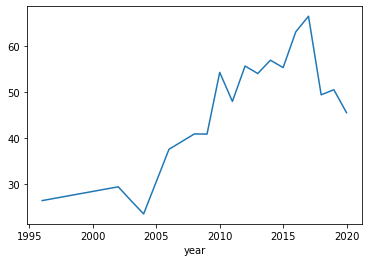

In [66]:
test.groupby('year')['mpg'].mean().plot()

In [67]:
test['engineSize'].value_counts()

2.0    648
3.0    251
1.5    152
1.6     11
4.4      5
0.0      3
4.0      2
2.5      2
3.2      2
2.8      1
2.2      1
6.6      1
Name: engineSize, dtype: int64

In [68]:
test['engine_group'] = pd.cut(test['engineSize'],[0,1.5,2,float('inf')])

In [69]:
print_error('engine_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
engine_group,,,,,
"(0.0, 1.5]",152,1123.779186,259.281680,-393.046907,1516.826094
"(1.5, 2.0]",659,1421.948186,22.797613,-94.877908,1516.826094
"(2.0, inf]",265,1982.756381,201.863063,465.930288,1516.826094


# Feature importances

In [70]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,year,21.659197
1,engineSize,19.882497
2,mileage,17.953125
3,model,16.591116
4,mpg,14.288914
5,fuelType,4.845463
6,transmission,3.382191
7,tax,1.397497


# SHAP

In [74]:
import shap
shap.initjs()

In [76]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [80]:
pd.DataFrame(shap_values,columns=X) #вклад, котороый внес

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-962.337682,3959.127163,-2349.807968,4076.321789,813.373388,188.893250,-940.342866,-316.114033
1,-2038.802378,-2260.540866,930.186981,-786.136673,-575.360470,-269.606402,-958.084526,-1900.989098
2,4017.876247,6376.773518,767.593978,3285.331390,875.873687,-350.641030,-649.788313,-948.439035
3,-3015.775851,-585.317767,-2260.305270,-324.068872,-842.533357,284.231687,-1001.641080,-1802.066033
4,-919.464486,-927.786296,257.525490,-1442.564561,228.486787,34.828521,-591.771687,2733.476851
...,...,...,...,...,...,...,...,...
1074,187.651495,3766.271693,511.461397,5761.167291,1339.422370,79.980546,291.061441,-825.149311
1075,-844.069902,3997.496359,714.227363,1618.285986,759.639890,167.933880,-793.585103,-807.606459
1076,8084.661250,3124.542456,1463.182034,8294.623169,1792.231054,-333.886262,3657.242713,4984.954013
1077,-2307.631808,-4768.372798,-2072.227596,-3209.294702,12.005190,-363.319888,-1247.976686,-409.911826


In [81]:
train['price'].mean()

22768.483920841063

In [82]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], test[X].iloc[0,:])

<AxesSubplot:>

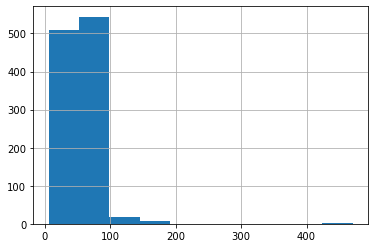

In [84]:
test['mpg'].hist()

In [85]:
(test['mpg'] < 34.9).mean()

0.06580166821130677

## ТОП-10 ошибок

In [86]:
shap_cols = [x+'_shap' for x in X]

In [87]:
shap_cols

['model_shap',
 'year_shap',
 'transmission_shap',
 'mileage_shap',
 'fuelType_shap',
 'tax_shap',
 'mpg_shap',
 'engineSize_shap']

In [88]:
shap_values_df = pd.DataFrame(shap_values,columns=shap_cols)

In [89]:
shap_values_df

,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
0,-962.337682,3959.127163,-2349.807968,4076.321789,813.373388,188.893250,-940.342866,-316.114033
1,-2038.802378,-2260.540866,930.186981,-786.136673,-575.360470,-269.606402,-958.084526,-1900.989098
2,4017.876247,6376.773518,767.593978,3285.331390,875.873687,-350.641030,-649.788313,-948.439035
3,-3015.775851,-585.317767,-2260.305270,-324.068872,-842.533357,284.231687,-1001.641080,-1802.066033
4,-919.464486,-927.786296,257.525490,-1442.564561,228.486787,34.828521,-591.771687,2733.476851
...,...,...,...,...,...,...,...,...
1074,187.651495,3766.271693,511.461397,5761.167291,1339.422370,79.980546,291.061441,-825.149311
1075,-844.069902,3997.496359,714.227363,1618.285986,759.639890,167.933880,-793.585103,-807.606459
1076,8084.661250,3124.542456,1463.182034,8294.623169,1792.231054,-333.886262,3657.242713,4984.954013
1077,-2307.631808,-4768.372798,-2072.227596,-3209.294702,12.005190,-363.319888,-1247.976686,-409.911826


In [90]:
test_shap = pd.concat([test.reset_index(),shap_values_df],axis=1)

In [91]:
test_shap

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,...,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
0,3166,3 Series,2019,29480,Manual,2802,Diesel,145,54.3,2.0,...,"(50.4, 55.4]","(1.5, 2.0]",-962.337682,3959.127163,-2349.807968,4076.321789,813.373388,188.893250,-940.342866,-316.114033
1,7058,2 Series,2016,15814,Semi-Auto,28966,Petrol,125,52.3,1.5,...,"(50.4, 55.4]","(0.0, 1.5]",-2038.802378,-2260.540866,930.186981,-786.136673,-575.360470,-269.606402,-958.084526,-1900.989098
2,376,X3,2020,35900,Semi-Auto,4500,Diesel,150,54.3,2.0,...,"(50.4, 55.4]","(1.5, 2.0]",4017.876247,6376.773518,767.593978,3285.331390,875.873687,-350.641030,-649.788313,-948.439035
3,9402,1 Series,2017,11999,Manual,19108,Petrol,145,56.5,1.5,...,"(55.4, 64.2]","(0.0, 1.5]",-3015.775851,-585.317767,-2260.305270,-324.068872,-842.533357,284.231687,-1001.641080,-1802.066033
4,8301,4 Series,2017,22995,Automatic,29989,Diesel,150,49.6,3.0,...,"(41.5, 50.4]","(2.0, inf]",-919.464486,-927.786296,257.525490,-1442.564561,228.486787,34.828521,-591.771687,2733.476851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1452,3 Series,2019,34370,Automatic,123,Diesel,145,50.4,2.0,...,"(41.5, 50.4]","(1.5, 2.0]",187.651495,3766.271693,511.461397,5761.167291,1339.422370,79.980546,291.061441,-825.149311
1075,4921,3 Series,2019,28990,Semi-Auto,7322,Diesel,145,52.3,2.0,...,"(50.4, 55.4]","(1.5, 2.0]",-844.069902,3997.496359,714.227363,1618.285986,759.639890,167.933880,-793.585103,-807.606459
1076,7236,X5,2019,52875,Semi-Auto,10,Diesel,150,37.7,3.0,...,"(5.499, 41.5]","(2.0, inf]",8084.661250,3124.542456,1463.182034,8294.623169,1792.231054,-333.886262,3657.242713,4984.954013
1077,9249,1 Series,2013,7675,Manual,60000,Diesel,30,65.7,2.0,...,"(64.2, 470.8]","(1.5, 2.0]",-2307.631808,-4768.372798,-2072.227596,-3209.294702,12.005190,-363.319888,-1247.976686,-409.911826


In [93]:
test_shap = test_shap.sort_values('error_abs',ascending=False)

In [94]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cols].values[0,:], test_shap[X].iloc[0,:])

In [95]:
pd.options.display.max_columns = 100

In [96]:
test_shap

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
855,2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32164.863783,-12815.136217,12815.136217,"(29995.0, 74990.0]","(0.999, 4117.8]","(125.0, 145.0]","(55.4, 64.2]","(1.5, 2.0]",3728.542528,2803.638323,924.625538,5496.954156,177.491429,-147.556970,-1286.310546,-2300.781590
673,4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46800.596850,-11861.403150,11861.403150,"(29995.0, 74990.0]","(0.999, 4117.8]","(125.0, 145.0]","(5.499, 41.5]","(2.0, inf]",6606.701782,2897.318542,906.706544,5090.406931,-2092.112519,87.337048,6000.219748,4535.757858
621,5264,5 Series,2019,38450,Automatic,14522,Diesel,145,62.8,2.0,27535.254872,-10914.745128,10914.745128,"(29995.0, 74990.0]","(9791.6, 24298.6]","(125.0, 145.0]","(55.4, 64.2]","(1.5, 2.0]",1654.239965,4165.383196,511.856016,262.786191,591.267201,282.833185,-1822.903704,-878.468095
816,5281,5 Series,2019,39999,Semi-Auto,5877,Diesel,145,60.1,2.0,29554.310391,-10444.689609,10444.689609,"(29995.0, 74990.0]","(4117.8, 9791.6]","(125.0, 145.0]","(55.4, 64.2]","(1.5, 2.0]",1765.915174,3902.044804,838.331139,2083.838946,476.180112,235.433218,-1480.542265,-1035.151654
529,4245,Z4,2020,50800,Semi-Auto,1142,Petrol,145,33.2,3.0,41145.517456,-9654.482544,9654.482544,"(29995.0, 74990.0]","(0.999, 4117.8]","(125.0, 145.0]","(5.499, 41.5]","(2.0, inf]",1370.573931,5201.567373,1312.734691,3510.990837,-3081.308736,-114.911819,6950.841881,3226.768382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,10397,1 Series,2017,13300,Automatic,25933,Diesel,20,72.4,1.5,13310.352204,10.352204,10.352204,"(2989.999, 13999.0]","(24298.6, 43864.4]","(-0.001, 125.0]","(64.2, 470.8]","(0.0, 1.5]",-3034.079507,-765.531003,252.015381,-707.438486,-157.530939,-437.309429,-2568.477235,-2039.557493
664,9311,X3,2009,7675,Manual,70000,Diesel,195,45.6,2.0,7685.106360,10.106360,10.106360,"(2989.999, 13999.0]","(43864.4, 178987.0]","(150.0, 580.0]","(41.5, 50.4]","(1.5, 2.0]",1913.097367,-10085.387988,-2109.882913,-4419.084195,523.207297,-277.302526,169.180397,-796.981995
270,9630,X1,2017,14226,Manual,41950,Diesel,20,68.9,2.0,14218.512839,-7.487161,7.487161,"(13999.0, 18500.0]","(24298.6, 43864.4]","(-0.001, 125.0]","(64.2, 470.8]","(1.5, 2.0]",-373.232267,-200.045966,-2392.896400,-2668.680809,-115.085376,-279.315983,-1983.365121,-537.126155
383,4860,1 Series,2017,13500,Manual,34500,Diesel,150,65.7,2.0,13497.568895,-2.431105,2.431105,"(2989.999, 13999.0]","(24298.6, 43864.4]","(145.0, 150.0]","(64.2, 470.8]","(1.5, 2.0]",-2846.474101,-194.953013,-2316.764310,-2063.534836,138.000083,168.909100,-1647.685029,-508.189915


In [97]:
print_error('model')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
model,,,,,
1 Series,198,1119.494150,15.016188,-397.331944,1516.826094
2 Series,123,1367.976725,194.632128,-148.849368,1516.826094
3 Series,229,1373.020657,7.890586,-143.805436,1516.826094
4 Series,84,1517.428442,147.797249,0.602348,1516.826094
5 Series,112,1627.828617,-25.799192,111.002523,1516.826094
6 Series,8,2298.525410,887.347965,781.699316,1516.826094
7 Series,11,2688.079800,-1393.563664,1171.253706,1516.826094
8 Series,3,1366.522617,-639.845340,-150.303477,1516.826094
M2,4,3235.010665,2922.311743,1718.184572,1516.826094


<AxesSubplot:>

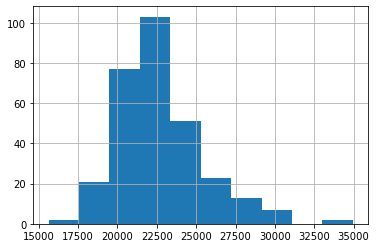

In [101]:
train[(train['model'] == ' 2 Series')&(train['year'] == 2019)]['price'].hist()

<AxesSubplot:>

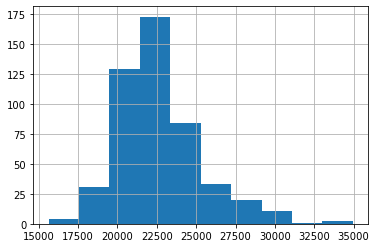

In [102]:
df[(df['model'] == ' 2 Series')&(df['year'] == 2019)]['price'].hist()

In [103]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cols].head(10).values,
                                          test_shap[X].head(10))

In [104]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cols].values,
                                          test_shap[X])

# Dependence plot

In [105]:
X

['model',
 'year',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

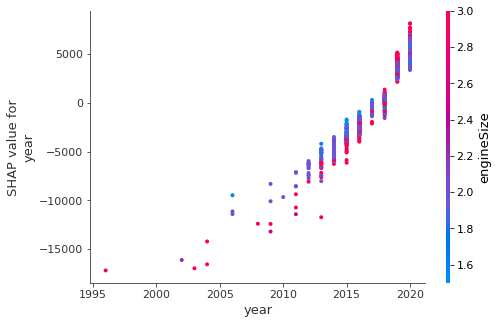

In [106]:
shap.dependence_plot("year", shap_values, test[X])

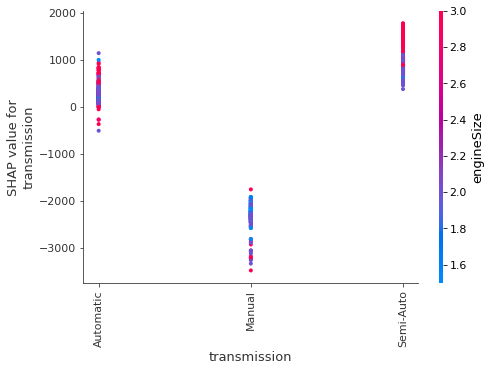

In [107]:
shap.dependence_plot("transmission", shap_values, test[X])

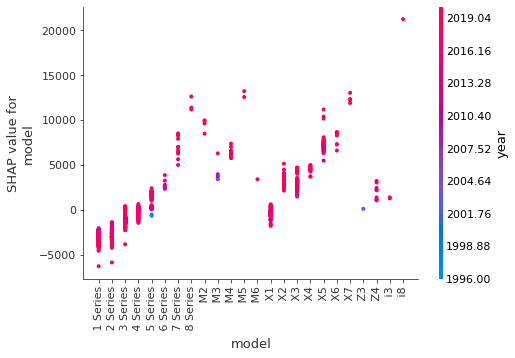

In [109]:
shap.dependence_plot("model", shap_values, test[X])

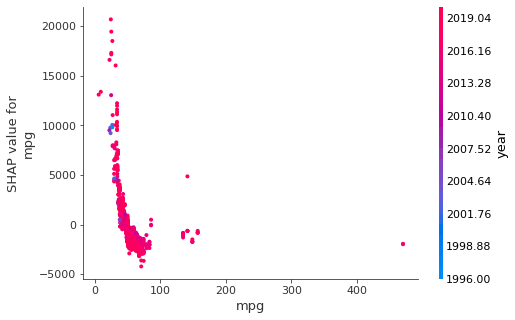

In [111]:
shap.dependence_plot("mpg", shap_values, test[X])

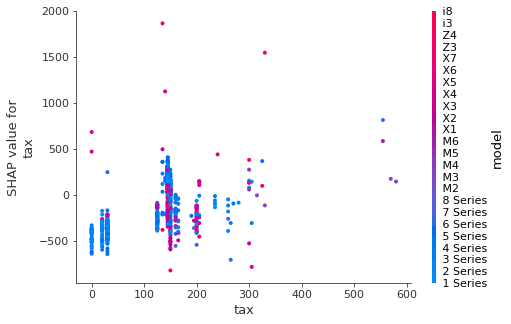

In [112]:
shap.dependence_plot("tax", shap_values, test[X])

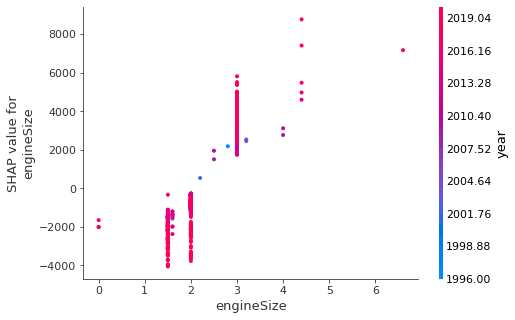

In [114]:
shap.dependence_plot("engineSize", shap_values, test[X])

# Summary plot

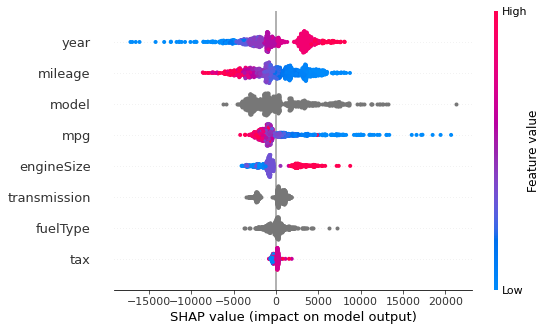

In [115]:
shap.summary_plot(shap_values, test[X])